<img src='../OUTILS/bandeau_MF.png' align='right' width='100%'/>

<div class="alert alert-info alert-success">
<h3>Elaboration de la RGB Dust - FCI /MTG </h3></div>

## <a id='TOC-TOP'></a>Contenus

<div class="alert alert-block alert-warning">
    
<b>PREREQUIS </b>
    
Ce Notebook ne nécessite pas de prérequis

</div>
<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1.Tout d'abord, il faut procéder à l'importation des librairies nécessaires.

</div>

In [1]:
from PIL import Image
from IPython.display import display, HTML
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import subprocess
import sys
import os
from osgeo import gdal
from PIL import Image
os.environ['PATH'] = f"~/.conda/envs/env_MF_stage/bin:{os.environ['PATH']}" 
os.environ['GDAL_DATA'] = '/home/coster/.conda/envs/env_MF_stage/share/gdal'
os.environ['PROJ_LIB'] = '/home/coster/.conda/envs/env_MF_stage/share/proj'

### Données d'entrée et de sortie :

In [2]:
download_dir = os.path.join(os.getcwd(), "../RESULTS")
os.makedirs(download_dir, exist_ok=True)

In [3]:
input = '/home/coster/MF_DATA/Mmultic_mtg/Mmultic2kmNC4_mtgi1_202410091200.nc'
output = '../RESULTS/'

In [4]:
!gdalinfo {input}

Driver: netCDF/Network Common Data Format
Files: /home/coster/MF_DATA/Mmultic_mtg/Mmultic2kmNC4_mtgi1_202410091200.nc
Size is 512, 512
Metadata:
  NC_GLOBAL#Area_of_acquisition=globe
  NC_GLOBAL#cdm_data_type=NetCDF
  NC_GLOBAL#comment=Status experimental
  NC_GLOBAL#Conventions=CF-1.5
  NC_GLOBAL#converted_by=Sat2Netcdf Version 1.0
  NC_GLOBAL#creator_email=meteo-spatiale@meteo.fr
  NC_GLOBAL#creator_name=CMS-Lannion
  NC_GLOBAL#creator_url=http://www.meteo-spatiale.fr
  NC_GLOBAL#date_created=2024-10-09 12:15
  NC_GLOBAL#Exploration_mode=0
  NC_GLOBAL#geospatial_lat_max=81.172699
  NC_GLOBAL#geospatial_lat_min=-81.172699
  NC_GLOBAL#geospatial_lon_max=81.172699
  NC_GLOBAL#geospatial_lon_min=-81.172699
  NC_GLOBAL#geospatial_vertical_max=0
  NC_GLOBAL#geospatial_vertical_min=0
  NC_GLOBAL#history=Created on 2024-10-09 12:15 by CMS-Lannion  : Sat2Netcdf -ncml file:/A3/mtg/app/NC2NetcdfFdhsi/produits/mtgi1.ncml cycle_mtgi1_20241009_120000/NCTrail.nc
  NC_GLOBAL#id=20241009_20000
  NC_G

In [5]:
#!gdalinfo -mm NETCDF:"../../MF_DATA/MTG/MTG_multic/Multic2km_mtgi1_20231122_140000.nc":VIS006

In [6]:
!pwd

/home/coster/MF_DATA_MANIPULATION/NOTEBOOK


In [7]:
!gdal_translate -ot byte -scale 0 2000 0 255 NETCDF:"/home/coster/MF_DATA/Mmultic_mtg/Mmultic2kmNC4_mtgi1_202410091200.nc":VIS006 {output}VIS006.tif

Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
Warning 1: for band 1, nodata value has been clamped to 0, the original value being out of range.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [8]:
!convert -resize 300x300 {output}VIS006.tif {output}VIS006.jpg  > /dev/null 2>&1

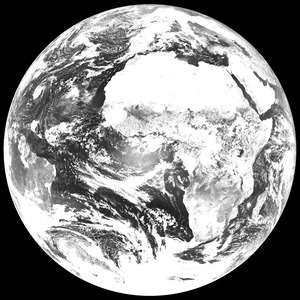

In [9]:
im = Image.open(output + 'VIS006.jpg', 'r')
display(im)

### Extraction des données dans le NetCDF

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2.Extraction des données dans le NetCDF
[Back to top](#TOC-TOP)

</div>


Pour rappel, la recette de la RGB Dust est la suivante :

<img src='../OUTILS/dust_tableau.png' align='left' width='60%'/>
 </div>


Pour rappel, la recette de la RGB Dust est la suivante :

Red: IR12.3 – IR10.5, range -4 to +2 K, Gamma = 1.0

Green: IR10.5 – IR8.7, Range 0 to +15 K, Gamma = 2.5

Blue: IR10.5, range 261 to 289 K, Gamma = 1.0

Extraction des données des trois longueurs d'ondes nécessaires aux calculs des différences :

In [10]:
!gdal_translate NETCDF:"$input":IR_105 {output}/105.tif
!gdal_translate NETCDF:"$input":IR_123 {output}/123.tif
!gdal_translate NETCDF:"$input":IR_087 {output}/087.tif

Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
0...10...20...30...40...50...60...70...80...90...100 - done.
Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
0...10...20...30...40...50...60...70...80...90...100 - done.
Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
0...10...20...30...40...50...60...70...80...90...100 - done.


In [11]:
!gdalinfo NETCDF:"$input":IR_087

Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Driver: netCDF/Network Common Data Format
Files: /home/coster/MF_DATA/Mmultic_mtg/Mmultic2kmNC4_mtgi1_202410091200.nc
Size is 5568, 5568
Coordinate System is:
PROJCRS["unnamed",
    BASEGEOGCRS["unamed ellipse ",
        DATUM["unknown",
            ELLIPSOID["unamed",6378169,295.488065897,
                LENGTHUNIT["metre",1,
                    ID["EPSG",9001]]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]]],
    CONVERSION["unnamed",
        METHOD["Geostationary Satellite (Sweep Y)"],
        PARAMETER["Longitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Satellite Height",35786400,
            LENGTHUNIT["meter",1]],
        PARAMETER["False easting",0,
            LENGTHUNIT["meter",1],
            ID["EPSG",8806]],
        PARAMETER["Fal

Extraction des données IR 10.5 pour la bande bleue.
Les valeurs 261 et 289 K correspondent à -12,15 °C et 15,85 °C
Dans le NetCDF, les données sont en centième de °C.

In [12]:
#!gdalinfo  NETCDF:"$input":IR_105

In [13]:
!gdal_translate -ot byte -scale -1215 1585 0 255 NETCDF:"$input":IR_105 {output}/105_-1215_1585.tif

Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
Warning 1: for band 1, nodata value has been clamped to 0, the original value being out of range.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [14]:
!gdal_translate -ot byte -scale 5000 -8000 0 255 NETCDF:"$input":IR_105 {output}/105_5000_-8000.tif

Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
Warning 1: for band 1, nodata value has been clamped to 0, the original value being out of range.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [15]:
!convert -resize 500 {output}/105_-1215_1585.tif {output}105_-1215_1585.jpg 2>/dev/null
!convert -resize 500 {output}/105_5000_-8000.tif {output}/105_5000_-8000.jpg 2>/dev/null

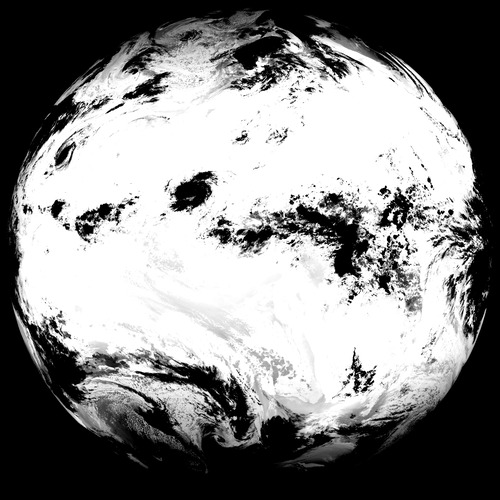

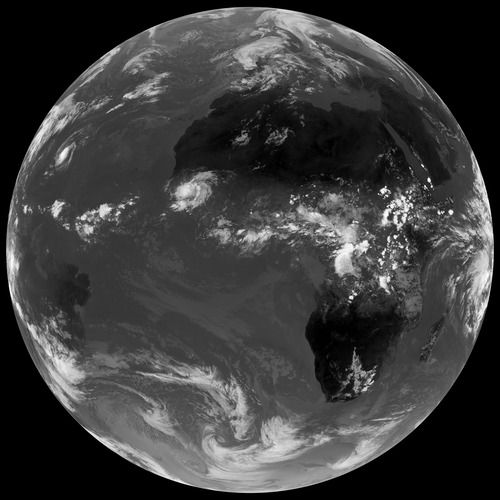

In [16]:
im_a = Image.open(output + '/105_-1215_1585.jpg', 'r')
display(im_a)
im_b = Image.open(output + '/105_5000_-8000.jpg', 'r')
display(im_b)

#### Affichage des images 105_-1215_1585.jpg et 105_5000_-8000.jpg

### Calcul des différences

In [17]:
!gdal_calc.py  -A {output}/123.tif -B {output}/105.tif --outfile={output}/123_105.tif --calc="A-B"
!gdal_calc.py  -A {output}/105.tif -B {output}/087.tif --outfile={output}/105_087.tif --calc="A-B"

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


On met les différences sur les échelles -4-2 pour le rouge et 0-15 pour le vert.
Une différence en Kelvin et égale à une différence en °C.

In [18]:
!gdal_translate -ot byte -scale -400 200 0 255 {output}/123_105.tif {output}/123_105_scale.tif
!gdal_translate -ot byte -scale 0 1500 0 255 {output}/105_087.tif {output}/105_087_scale.tif

Input file size is 5568, 5568
Warning 1: for band 1, nodata value has been clamped to 0, the original value being out of range.
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 5568, 5568
Warning 1: for band 1, nodata value has been clamped to 0, the original value being out of range.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [19]:
!convert -resize 500 {output}/123_105_scale.tif {output}/123_105_scale.jpg 2>/dev/null
!convert -resize 500 {output}/105_087_scale.tif {output}/105_087_scale.jpg 2>/dev/null

In [20]:
#### Affichage des images 123_105_scale.jpg et 105_087_scale.jpg

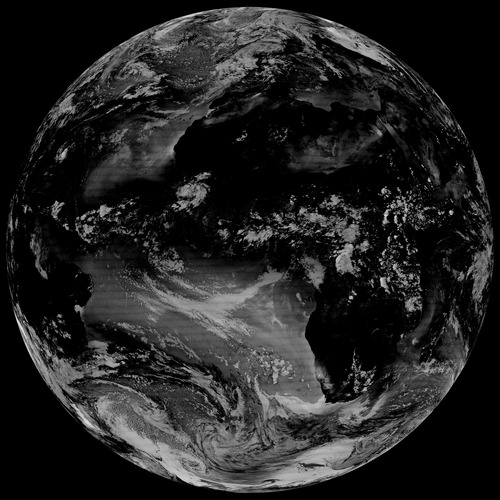

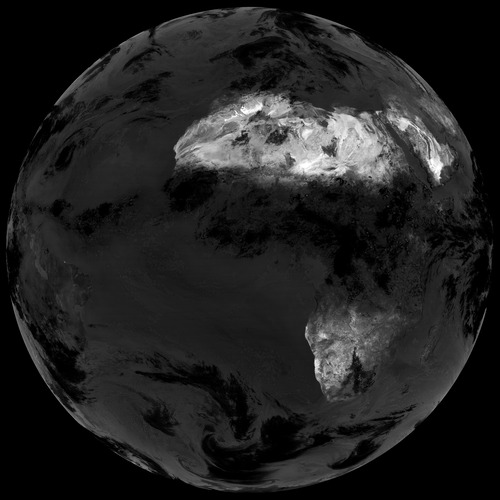

In [21]:
im_c = Image.open(output + '/123_105_scale.jpg', 'r')
display(im_c)
im_d = Image.open(output + '/105_087_scale.jpg', 'r')
display(im_d)

### Calcul de la correction gamma avec gdal_calc.py :

Pour rappel la formule de la correction gamme est :

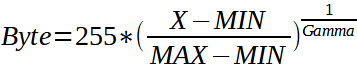


(Note : imagemagick permet de faire une correction gamma mais n'est pas compatible avec Windows)

La première étape consiste à extraire les valeurs min et max de l'image.

In [22]:
#file_in = '../RESULTS/105_087_scale_gamma.tif'
file_in = '../RESULTS/105_087_scale.tif'
imgpil = Image.open(file_in)  
img = np.array(imgpil)
max = np.max(img)
min = np.min(img)

In [23]:
!convert -resize 500 {file_in} {output}/105_087_scale_gamma_r.jpg 2>/dev/null


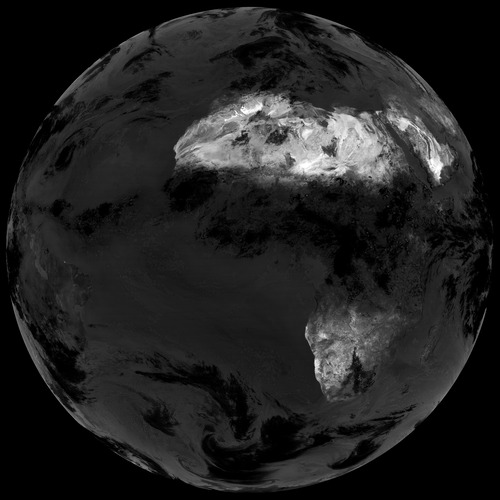

In [24]:
im5 = Image.open(output + '/105_087_scale_gamma_r.jpg', 'r')
display(im5)

In [25]:
max, min

(255, 0)

Ensuite on calcule et on applique la correction gamma pour une valeur de 2,5 :

In [26]:
gamma= 2.5

In [27]:
!gdal_calc.py --quiet --NoDataValue 0 --overwrite -A {file_in} --calc="numpy.maximum(A*0.,{max}*((A-{0}.)/({255}-{0}))**(1/{0.5}))" --outfile {output}/105_087_scale_gamma-faible.tif

In [28]:
!gdal_calc.py --quiet --NoDataValue 0 --overwrite -A {file_in} --calc="numpy.maximum(A*0.,{max}*((A-{min}.)/({max}-{min}))**(1/{2.5}))" --outfile {output}/105_087_scale_gamma.tif

In [29]:
#Gamma = 1 (Pour comparaison)
!gdal_calc.py --quiet --NoDataValue 0 --overwrite -A {file_in} --calc="numpy.maximum(A*0.,{max}*((A-{min}.)/({max}-{min}))**(1/{1}))" --outfile {output}/105_087_scale_gamma_1.tif

In [30]:
max, min

(255, 0)

In [31]:
!convert -resize 400 {output}/105_087_scale_gamma-faible.tif {output}/105_087_scale_gamma-faible.jpg 2>/dev/null
!convert -resize 400 {output}/105_087_scale_gamma.tif {output}/105_087_scale_gamma.jpg 2>/dev/null
!convert -resize 400 {output}/105_087_scale_gamma_1.tif {output}/105_087_scale_gamma_1.jpg 2>/dev/null

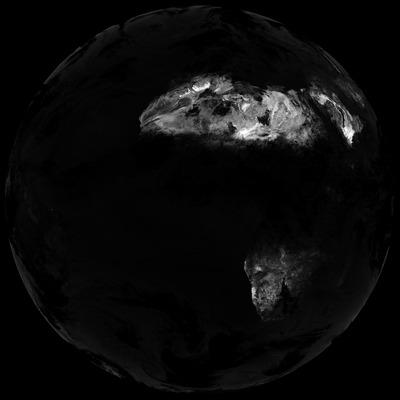

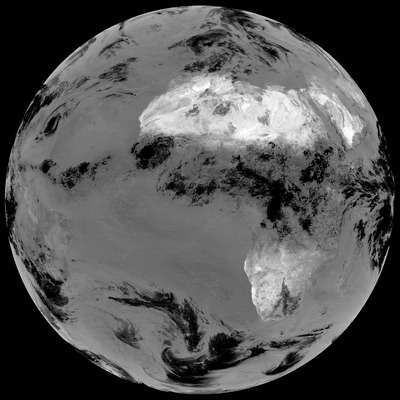

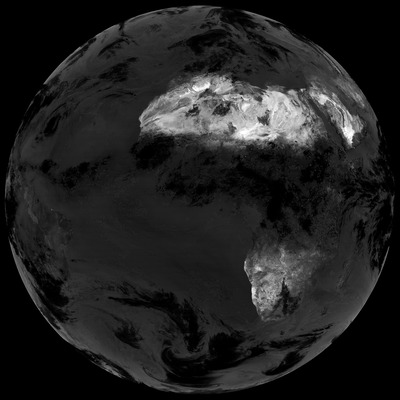

In [32]:
im6 = Image.open(output + '/105_087_scale_gamma-faible.jpg', 'r')
display(im6)
im7 = Image.open(output + '/105_087_scale_gamma.jpg', 'r')
display(im7)
im8 = Image.open(output + '/105_087_scale_gamma_1.jpg', 'r')
display(im8)

#### Affichage des images 105_087_scale_gamma-faible.jpg, 105_087_scale_gamma.jpg et 105_087_scale_gamma_1.jpg

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3.Fabrication de la RGB
[Back to top](#TOC-TOP)

</div>

In [33]:
!convert -gamma 10 {output}/105_087_scale.tif {output}/105_087_scale_gamma.tif 2>/dev/null

In [34]:
!gdal_merge.py -separate {output}/123_105_scale.tif {output}/105_087_scale.tif  {output}/105_-1215_1585.tif -o {output}/RGB_dust.tif
!convert -resize 700x700 {output}/RGB_dust.tif {output}/RGB_dust.jpg 2>/dev/null

0...10...20...30...40...50...60...70...80...90...100 - done.


### Visualisation du résultat

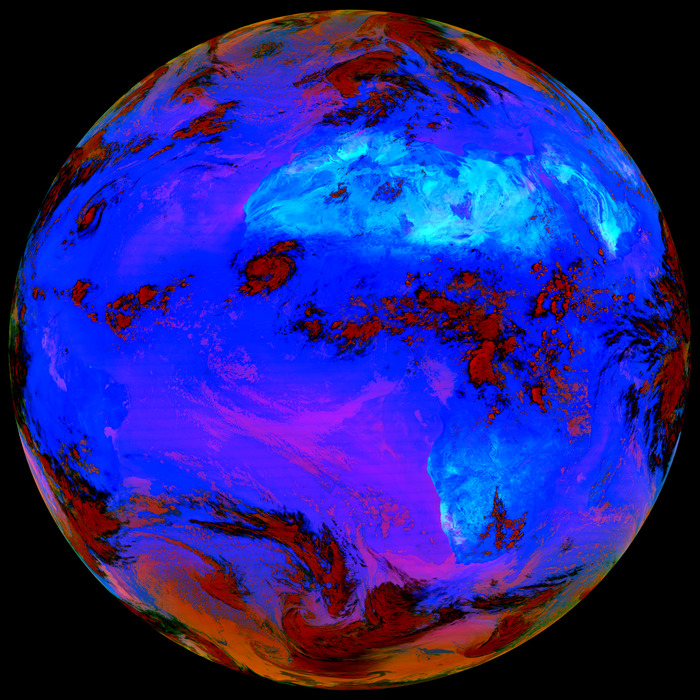

In [35]:
im9 = Image.open(output + '/RGB_dust.jpg', 'r')
display(im9)

Découpage et ajout des frontière

In [36]:
!gdalwarp -overwrite -t_srs "EPSG:4326" -te -23 8 15 40 {output}/RGB_dust.tif {output}/RGB_dust_decoupe.tif

Creating output file that is 2079P x 1751L.
Processing ../RESULTS//RGB_dust.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [37]:
!gdal_rasterize -q -b 1 -burn 255 -b 2 -burn 255 -b 3 -burn 255 -l world-administrative-boundaries ../OUTILS/boundary/world-administrative-boundaries.shp {output}/RGB_dust_decoupe.tif 
!convert -resize 700x700 {output}/RGB_dust_decoupe.tif  {output}/RGB_dust_decoupe.jpg 2>/dev/null

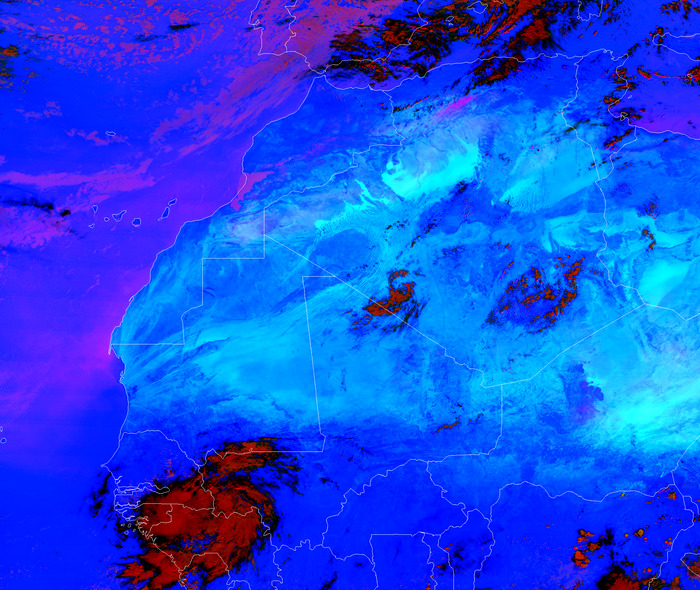

In [38]:
im10 = Image.open(output + '/RGB_dust_decoupe.jpg', 'r')
display(im10)

In [39]:
#Nettoyage
#!rm {output}/VIS006.tif {output}/123.tif {output}/*.tif